# Resume Selection

### STEP 1: IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

### STEP 2: LOADING THE DATASET

In [2]:
resume_df = pd.read_csv("data/resume_data.csv", encoding="latin-1")
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\r\nCustomer Service Supervisor/Tier - Isabell...
1,resume_2,not_flagged,\r\nEngineer / Scientist - IBM Microelectronic...
2,resume_3,not_flagged,\r\nLTS Software Engineer Computational Lithog...
3,resume_4,not_flagged,TUTOR\r\nWilliston VT - Email me on Indeed: i...
4,resume_5,flagged,\r\nIndependent Consultant - Self-employed\r\n...
...,...,...,...
120,resume_121,not_flagged,\r\nBrattleboro VT - Email me on Indeed: indee...
121,resume_122,not_flagged,\r\nResearch and Teaching Assistant - Universi...
122,resume_123,not_flagged,\r\nMedical Coder - Highly Skilled - Entry Lev...
123,resume_124,flagged,\r\nWaterbury VT - Email me on Indeed: indeed....


In [3]:
resume_df = resume_df[["resume_text", "class"]]
resume_df

,resume_text,class
0,\r\nCustomer Service Supervisor/Tier - Isabell...,not_flagged
1,\r\nEngineer / Scientist - IBM Microelectronic...,not_flagged
2,\r\nLTS Software Engineer Computational Lithog...,not_flagged
3,TUTOR\r\nWilliston VT - Email me on Indeed: i...,not_flagged
4,\r\nIndependent Consultant - Self-employed\r\n...,flagged
...,...,...
120,\r\nBrattleboro VT - Email me on Indeed: indee...,not_flagged
121,\r\nResearch and Teaching Assistant - Universi...,not_flagged
122,\r\nMedical Coder - Highly Skilled - Entry Lev...,not_flagged
123,\r\nWaterbury VT - Email me on Indeed: indeed....,flagged


### STEP 3: PERFORMING EXPLORATORY DATA ANALYSIS:

In [4]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [5]:
resume_df["class"].value_counts()

class
not_flagged    92
flagged        33
Name: count, dtype: int64

In [6]:
# HERE WE OBSERVE, WE HAVE NO NULL POINTS IN OUR DATASET
resume_df["class"] = resume_df["class"].apply(lambda x: 1 if x == "flagged" else 0)
resume_df

C:\Users\khizi\AppData\Local\Temp\ipykernel_197564\715608426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df["class"] = resume_df["class"].apply(lambda x: 1 if x == "flagged" else 0)


,resume_text,class
0,\r\nCustomer Service Supervisor/Tier - Isabell...,0
1,\r\nEngineer / Scientist - IBM Microelectronic...,0
2,\r\nLTS Software Engineer Computational Lithog...,0
3,TUTOR\r\nWilliston VT - Email me on Indeed: i...,0
4,\r\nIndependent Consultant - Self-employed\r\n...,1
...,...,...
120,\r\nBrattleboro VT - Email me on Indeed: indee...,0
121,\r\nResearch and Teaching Assistant - Universi...,0
122,\r\nMedical Coder - Highly Skilled - Entry Lev...,0
123,\r\nWaterbury VT - Email me on Indeed: indeed....,1


### STEP 4: PERFORMING DATA CLEANING:

In [7]:
# PREMOVING UNNECESSARY WORDS FROM DATASET

resume_df["resume_text"] = resume_df["resume_text"].apply(lambda x: x.replace("\r", ""))

nltk.download("punkt")
nltk.download("stopwords")

from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words.extend(["from", "subject", "edu", "re", "use", "email", "com"])


def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if (
            token not in gensim.parsing.preprocessing.STOPWORDS
            and len(token) > 2
            and token not in stop_words
        ):
            result.append(token)
    return " ".join(result)

C:\Users\khizi\AppData\Local\Temp\ipykernel_197564\29496023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df["resume_text"] = resume_df["resume_text"].apply(lambda x: x.replace("\r", ""))
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khizi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khizi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
resume_df

,resume_text,class
0,\nCustomer Service Supervisor/Tier - Isabella ...,0
1,\nEngineer / Scientist - IBM Microelectronics ...,0
2,\nLTS Software Engineer Computational Lithogra...,0
3,TUTOR\nWilliston VT - Email me on Indeed: ind...,0
4,\nIndependent Consultant - Self-employed\nBurl...,1
...,...,...
120,\nBrattleboro VT - Email me on Indeed: indeed....,0
121,\nResearch and Teaching Assistant - University...,0
122,\nMedical Coder - Highly Skilled - Entry Level...,0
123,\nWaterbury VT - Email me on Indeed: indeed.co...,1


In [9]:
resume_df["cleaned"] = resume_df["resume_text"].apply(preprocess)

resume_df

,resume_text,class,cleaned
0,\nCustomer Service Supervisor/Tier - Isabella ...,0,customer service supervisor tier isabella cata...
1,\nEngineer / Scientist - IBM Microelectronics ...,0,engineer scientist ibm division westford alber...
2,\nLTS Software Engineer Computational Lithogra...,0,lts software engineer computational lithograph...
3,TUTOR\nWilliston VT - Email me on Indeed: ind...,0,tutor williston alec schwartz work experience ...
4,\nIndependent Consultant - Self-employed\nBurl...,1,independent consultant self employed burlingto...
...,...,...,...
120,\nBrattleboro VT - Email me on Indeed: indeed....,0,brattleboro bcc skilled presenter trainer micr...
121,\nResearch and Teaching Assistant - University...,0,research teaching assistant university vermont...
122,\nMedical Coder - Highly Skilled - Entry Level...,0,medical coder highly skilled entry level sudbu...
123,\nWaterbury VT - Email me on Indeed: indeed.co...,1,waterbury bec willing relocate authorized work...


In [10]:
resume_df["cleaned"][0]

'customer service supervisor tier isabella catalog company south burlington aecf work experience customer service supervisor tier isabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information proofreading administrative assistant events coordinator office services assistant eileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects tra

### STEP 5: VISUALIZING CLEANED DATASETS

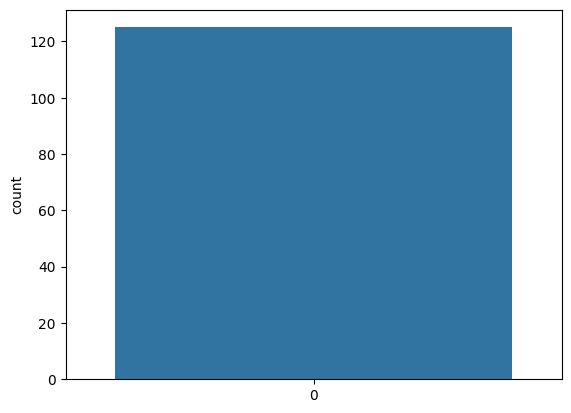

In [11]:
# PLOTTING COUNTS OF SAMPLE LABELLED AS 1 AND 0
sns.countplot(resume_df["class"], label="Count Plot")
plt.show()

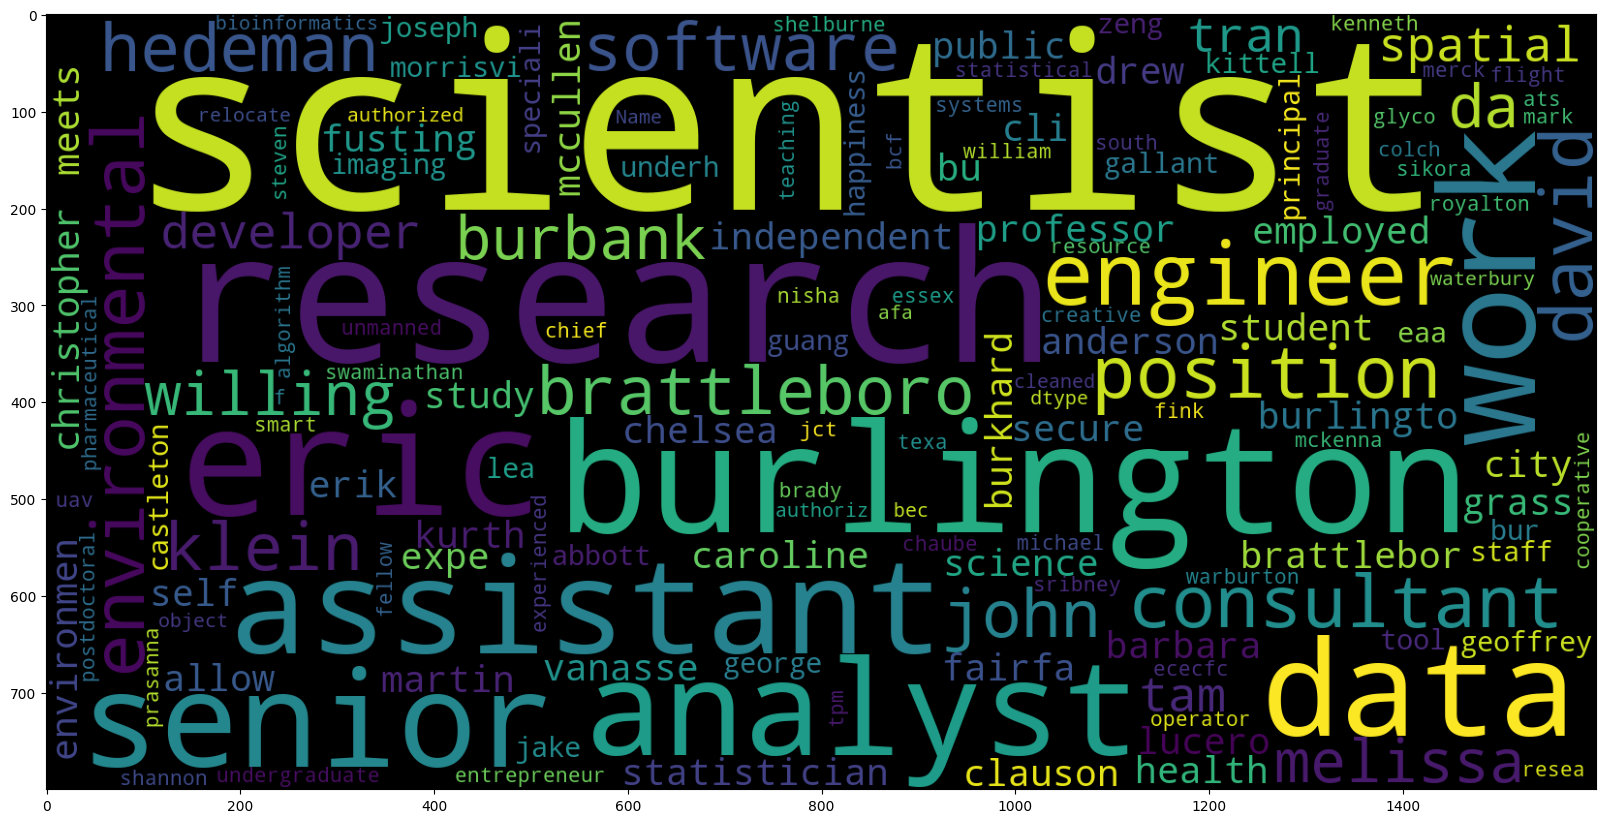

In [12]:
# PLOTTING THE WORDCLOUD:

# 1) FOR CLASS 1:

%matplotlib inline

plt.figure(figsize = (20, 20))

wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))

plt.imshow(wc)

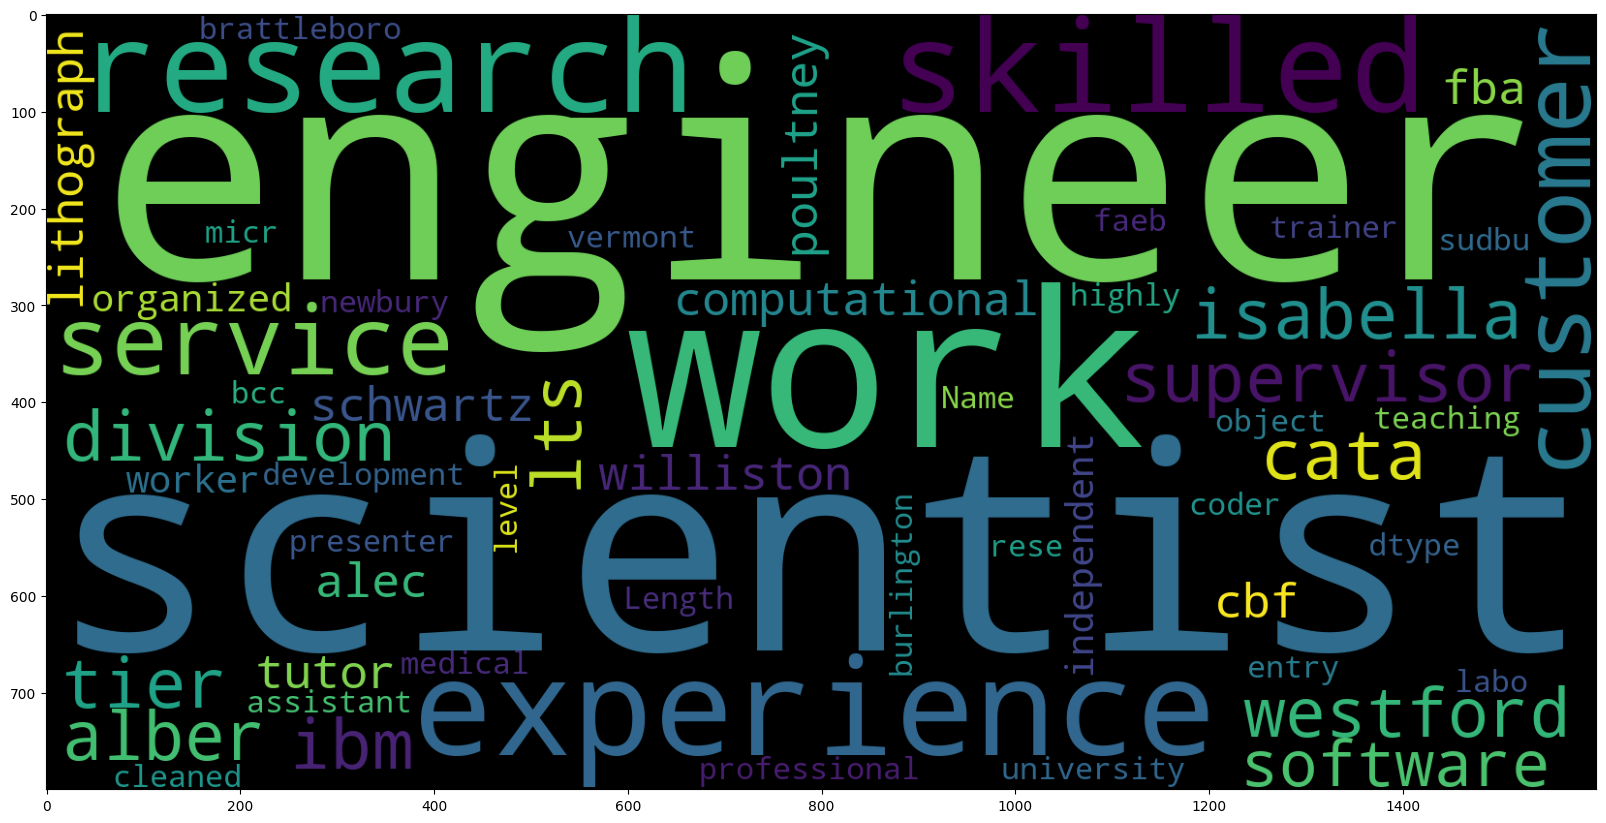

In [13]:
#1) FOR CLASS 0:

%matplotlib inline

plt.figure(figsize = (20, 20))

wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))

plt.imshow(wc)

### STEP 6: PREPARING THE DATA BY APPLYING COUNT VECTORIZATION

In [14]:
# CONVERTING SENTENCES INTO TOKENIZED FORMS AND THEN CONVERTING TO NUMERICAL VALUES IN ORDER FOR THE MODEL TO TRAIN:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df["cleaned"])

print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... '½transmission' '½travel' '½what']


In [15]:
# PROCESSED DATA:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### STEP 7: TRAINING A NAIVE BAYES CLASSIFER

In [16]:
X = countvectorizer
y = resume_df["class"]

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


from sklearn.naive_bayes import MultinomialNB

Bayes_clf = MultinomialNB(alpha=3)
Bayes_clf.fit(X_train, y_train)  ## Training the model

MultinomialNB(alpha=3)

### STEP 8: ASSESING THE TRAINED MODEL

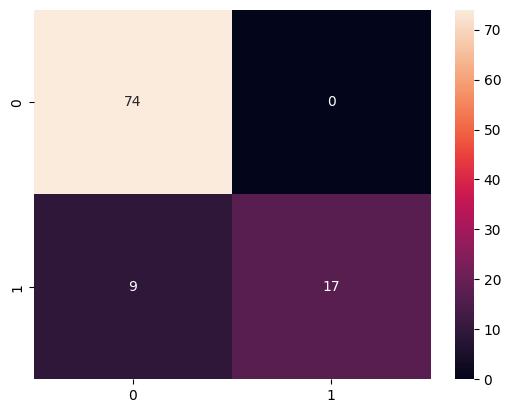

In [17]:
%matplotlib inline

# PLOTTING CONFUSION MATRIX:

# 1) FOR TRAINING DATA

y_pred_train = Bayes_clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm, annot=True)

plt.show()

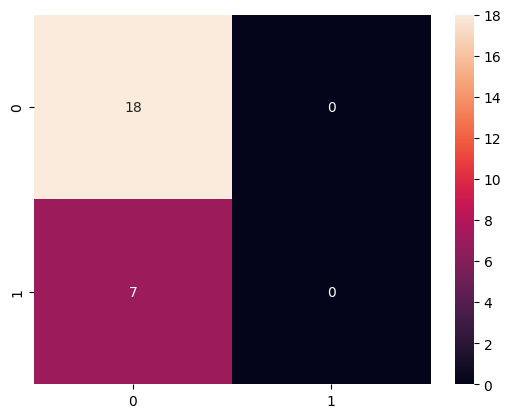

In [18]:
%matplotlib inline

# WE CAN SEE OUR MODEL PERFORMED REALLY WELL ON TRAINING DATA: IT CLASSFIED ALL OF THE POINTS CORRECTLY

# 2) FOR TEST DATA:

y_pred_test = Bayes_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True)

plt.show()

In [19]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       0.00      0.00      0.00         7

    accuracy                           0.72        25
   macro avg       0.36      0.50      0.42        25
weighted avg       0.52      0.72      0.60        25



c:\Users\khizi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\khizi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\khizi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [20]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

print(
    "Accuracy of model on Train Dataset = {}".format(
        accuracy_score(y_train, y_pred_train)
    )
)
print(
    "Accuracy of model on Test Dataset = {}".format(accuracy_score(y_test, y_pred_test))
)

Accuracy of model on Train Dataset = 0.91
Accuracy of model on Test Dataset = 0.72


In [21]:
print("Accuracy of model is = {}".format(accuracy_score(y_test, y_pred_test)))
print("F1 of model is = {}".format(f1_score(y_test, y_pred_test)))
print("Precision of model is = {}".format(precision_score(y_test, y_pred_test)))
print("Recall of model is = {}".format(recall_score(y_test, y_pred_test)))

Accuracy of model is = 0.72
F1 of model is = 0.0
Precision of model is = 0.0
Recall of model is = 0.0


c:\Users\khizi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
